In [1]:
import pickle
import os
import re
from collections import Counter
import math
import matplotlib.pyplot as plt
import random
import json
import datetime
import string
string.punctuation += '➡•’'
import numpy as np
from adjustText import adjust_text
import matplotlib.cm as cm
import spacy
import pandas as pd

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/frame

AttributeError: module 'cymem.cymem' has no attribute 'PyMalloc'

In [3]:
! python -m spacy download en_core_web_md

     |████████████████████████████████| 120.8 MB 4.8 MB/s eta 0:00:01

    Linking successful
    /opt/anaconda3/envs/py37/lib/python3.7/site-packages/en_core_web_md -->
    /opt/anaconda3/envs/py37/lib/python3.7/site-packages/spacy/data/en_core_web_md

    You can now load the model via spacy.load('en_core_web_md')



In [4]:
nlp=spacy.load('en_core_web_md', disable=['parser', 'tagger', 'ner'])

AttributeError: module 'cymem.cymem' has no attribute 'PyMalloc'

In [ ]:
# sp_tokens = ['de', 'la', 's', 'm', 'las', 'los', 'p', 've', 'en', 're', 'del', 't', 'que' ]""

In [ ]:
dem = pickle.load(open('../../data/all_tweet_texts_dem.p', 'rb'))
rep = pickle.load(open('../../data/all_tweet_texts_rep.p', 'rb'))


In [ ]:
data_path = '../../data/'
house_rep_screennames = pickle.load(open(data_path+'house_rep_screennames.p', 'rb'))
house_dem_screennames = pickle.load(open(data_path+'house_dem_screennames.p', 'rb'))
senate_dem_screennames = pickle.load(open(data_path+'senate_dem_screennames.p', 'rb'))
senate_rep_screennames = pickle.load(open(data_path+'senate_rep_screennames.p', 'rb'))
govenor_rep_screennames = pickle.load(open(data_path+'govenor_rep_screennames.p', 'rb'))
govenor_dem_screennames = pickle.load(open(data_path+'govenor_dem_screennames.p', 'rb'))

In [ ]:
all_screenname = set(house_rep_screennames + house_dem_screennames + senate_dem_screennames + senate_rep_screennames\
                + govenor_rep_screennames + govenor_dem_screennames + ['realDonaldTrump'])

In [45]:
all_screenname

{'AsaHutchinson',
 'AustinScottGA08',
 'BennieGThompson',
 'BettyMcCollum04',
 'BillPascrell',
 'BobbyScott',
 'BradSherman',
 'Call_Me_Dutch',
 'ChrisCoons',
 'ChrisMurphyCT',
 'ChrisVanHollen',
 'ChuckGrassley',
 'ConawayTX11',
 'CongBoyle',
 'CongMikeSimpson',
 'CongPalazzo',
 'CongressmanGT',
 'CongressmanHice',
 'CongressmanJVD',
 'CongressmanRaja',
 'DWStweets',
 'DesJarlaisTN04',
 'DonaldNorcross',
 'DorisMatsui',
 'DougBurgum',
 'DrNealDunnFL2',
 'DrPhilRoe',
 'EdLaborGOP',
 'EleanorNorton',
 'FrankDLucas',
 'FrankPallone',
 'GKButterfield',
 'GOPLeader',
 'GReschenthaler',
 'GavinNewsom',
 'GerryConnolly',
 'GovAbbott',
 'GovAndyBeshear',
 'GovBillLee',
 'GovChrisSununu',
 'GovDunleavy',
 'GovEvers',
 'GovHawaii',
 'GovHerbert',
 'GovHolcomb',
 'GovInslee',
 'GovJanetMills',
 'GovKemp',
 'GovLarryHogan',
 'GovLauraKelly',
 'GovMLG',
 'GovMikeDeWine',
 'GovMurphy',
 'GovNedLamont',
 'GovPhilScott',
 'GovPritzker',
 'GovRaimondo',
 'GovRicketts',
 'GovRonDeSantis',
 'GovSisolak'

In [7]:
covid_vocab = pickle.load(open('../../data/all_covid_words.p', 'rb'))

In [8]:
big_regex = re.compile('|'.join(map(re.escape, covid_vocab)))

In [9]:
def get_covid_tweets(df):
    all_covid_tweets = []
    all_bg_tweets = []
    for idx, row in df.iterrows():
        try:
            line = row['Text']
            line = line.lower()
            if 'covid' in line or 'coronavirus' in line:
                processed_line = big_regex.sub('covid', line)
                all_covid_tweets.append(processed_line)
            else:
                all_bg_tweets.append(line)
        except Exception as ex:
            continue
        
    return all_covid_tweets, all_bg_tweets

In [10]:
dem_covid, dem_bg = get_covid_tweets(dem)
rep_covid, rep_bg = get_covid_tweets(rep)
bg = dem_bg + rep_bg

/var/folders/9t/lplpnk8j495cb3drsnvfhsfw0000gn/T/ipykernel_18261/2231793725.py:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  for idx, row in df.iterrows():


In [11]:
dem_covid[0]

'the health of american people &amp; u.s. economy must come first. instead of forcing #unemployment aid to lapse while republicans fight among themselves, senate gop should join dems in extending #ui to save people &amp; businesses as covid cases are surging. \n'

In [12]:
len(dem_covid), len(rep_covid), len(bg)

(61944, 37879, 340416)

In [13]:
exclude_words = set(['Ricketts', 'RepPressley', 'Beshear', 'GregHilburn1', 'HouseDemocrats', 'RepBera', 'OversightDems', 
 'WaysandMeansGOP', 'dougducey', 'SteveScalise', 'HouseGOP', 'SecretarySonny', 'Hutchinson', 'GOPoversight',
 'AsaHutchinson','GOPLeader', 'GovRicketts','WhiteHouse','m', 'ChadSabadie', 'HouseCommerce','✓'])

In [14]:
punc = string.punctuation.replace("#", '')

In [15]:
punc

'!"$%&\'()*+,-./:;<=>?@[\\]^_`{|}~➡•’➡•’'

In [16]:
def preprocess_text(dem, rep, bg):
    print(dem[0])
    dem = [t.replace('\n', '').replace('&amp', 'and').translate(str.maketrans('', '', punc)) for t in dem]
    dem_tokenized = [token.text for t in dem for token in nlp(t)]
    dem_tokenized = [t for t in dem_tokenized if t not in all_screenname and t not in exclude_words]
    rep = [t.replace('\n', '').replace('&amp', 'and').translate(str.maketrans('', '', punc)) for t in rep]
    rep_tokenized = [token.text for t in rep for token in nlp(t)]
    rep_tokenized = [t for t in rep_tokenized if t not in all_screenname and t not in exclude_words]
    bg = [t.replace('\n', '').replace('&amp', 'and').translate(str.maketrans('', '', punc)) for t in bg]
    bg_tokenized = [token.text for t in bg for token in nlp(t)]
    bg_tokenized = [t for t in bg_tokenized if t not in all_screenname and t not in exclude_words]

    dem_counter=  Counter(dem_tokenized)
    rep_counter= Counter(rep_tokenized)
    bg_counter = Counter(bg_tokenized)
    return dem_counter, rep_counter, bg_counter

In [17]:
dem_counter, rep_counter, bg_counter = preprocess_text(dem_covid, rep_covid, bg)

the health of american people &amp; u.s. economy must come first. instead of forcing #unemployment aid to lapse while republicans fight among themselves, senate gop should join dems in extending #ui to save people &amp; businesses as covid cases are surging. 



In [18]:
len(bg_counter), len(dem_counter), len(rep_counter)

(183372, 52737, 36269)

In [19]:
dem_counter['covid']

63371

In [20]:
rep_counter['covid']

38787

In [21]:
bg_counter['covid']

0

In [22]:
dem_counter = {k:v for k, v in dem_counter.items() if v > 2 }
rep_counter = {k:v for k, v in rep_counter.items() if v > 2 }
bg_counter = {k:v for k, v in bg_counter.items() if v > 2 }


In [23]:
dem_counter

{'the': 84700,
 'health': 11041,
 'of': 36770,
 'american': 1665,
 'people': 4016,
 'and': 58384,
 'us': 4537,
 'economy': 1174,
 'must': 5092,
 'come': 497,
 'first': 1954,
 'instead': 286,
 'forcing': 55,
 '#': 18779,
 'unemployment': 1331,
 'aid': 832,
 'to': 84301,
 'lapse': 4,
 'while': 1436,
 'republicans': 333,
 'fight': 2362,
 'among': 320,
 'themselves': 288,
 'senate': 1395,
 'gop': 192,
 'should': 2781,
 'join': 2925,
 'dems': 99,
 'in': 28911,
 'extending': 85,
 'ui': 26,
 'save': 984,
 'businesses': 3347,
 'as': 8979,
 'covid': 63371,
 'cases': 3675,
 'are': 16099,
 'surging': 67,
 'rt': 12719,
 'cdcgov': 1317,
 'can': 7369,
 'be': 8536,
 'spread': 4773,
 'by': 6983,
 'who': 5140,
 'do': 4535,
 'not': 4960,
 'have': 10964,
 'symptoms': 894,
 'know': 1557,
 'that': 12197,
 'they': 5278,
 'infected': 224,
 'cloth': 164,
 'face': 1411,
 'coverings': 132,
 'may': 1888,
 'help': 7240,
 'p': 75,
 '…': 10503,
 'habitatorg': 3,
 'our': 18689,
 'live': 3137,
 'discussion': 415,
 'a

In [24]:
def logodds(corpora_dic, bg_counter):
    """ It calculates the log odds ratio of term i's frequency between 
    a target corpus and another corpus, with the prior information from
    a background corpus. Inputs are:
    
    - a dictionary of Counter objects (corpora of our interest)
    - a Counter objects (background corpus)
    
    Output is a dictionary of dictionaries. Each dictionary contains the log 
    odds ratio of each word. 
    
    """
    corp_size = dict([(c, sum(corpora_dic[c].values())) for c in corpora_dic])
    bg_size = sum(bg_counter.values())
    result = dict([(c, {}) for c in corpora_dic])
    
    for name, c in corpora_dic.items():
        for word in c:
            #if 10 > sum(1 for corpus in corpora_dic.values() if corpus[word]):
            #    continue
            
            fi = c[word]
            fj = sum(co.get(word,0) for x, co in corpora_dic.items() if x != name)
            fbg = bg_counter.get(word,0)+0.0001
            ni = corp_size[name]
            nj = sum(x for idx, x in corp_size.items() if idx != name)
            nbg = bg_size
#             print(fi+fbg,ni+nbg-(fi+fbg),fj+fbg,nj+nbg-(fj+fbg))
            oddsratio = math.log(fi+fbg) - math.log(ni+nbg-(fi+fbg)) -\
                        math.log(fj+fbg) + math.log(nj+nbg-(fj+fbg))
            std = 1.0 / (fi+fbg) + 1.0 / (fj+fbg)
            z = oddsratio / math.sqrt(std)
            result[name][word] = z
            
    return result

In [25]:
result = logodds({'Republican_tweets': rep_counter, 'Democratic_tweets': dem_counter}, bg_counter)

In [26]:
top_rep = sorted(result['Republican_tweets'], key=result['Republican_tweets'].get, reverse=True)[0:40]

In [27]:
top_dem = sorted(result['Democratic_tweets'], key=result['Democratic_tweets'].get, reverse=True)[0:40]

In [28]:
embeddings = open('../../data/all_glove_gensim_word2vec_50_epoch.txt').readlines()

In [29]:
embeddings = [line.strip() for line in embeddings]

In [30]:
# embedding_dict = {}
# for line in embeddings[1:]:
#     line = line.split()
#     embedding_dict[line[0]] = [float(item) for item in line[1:]]


In [31]:
# pickle.dump(embedding_dict, open('embedding_dict_50_epoch.p', 'wb'))

In [33]:
len(embedding_dict)

409003

In [34]:
def create_ebd_dataframe(word_list):
    word_ebd_list = []
    for word in word_list:
        word_ebd_list.append([word, embedding_dict.get(word, 0)])
    df = pd.DataFrame(word_ebd_list, columns=['word', 'embedding'])
    df = df[df['embedding'] != 0]
    df = df.drop_duplicates(subset='word')
    return df

In [35]:
dem_embedding = create_ebd_dataframe(top_dem)
rep_embedding = create_ebd_dataframe(top_rep)

In [36]:
len(dem_embedding), len(rep_embedding)

(40, 39)

In [37]:
rep_embedding

,word,embedding
0,china,"[1.154586, -0.256591, 0.247304, -0.655446, 1.0..."
1,whitehouse,"[-0.331783, -0.141985, 0.358003, -0.615226, -0..."
2,nddoh,"[-0.24107, -0.239553, 0.343743, 0.362827, -0.5..."
3,press,"[1.223807, 0.074087, 0.115389, -0.10142, 0.288..."
4,ohios,"[-0.675577, -0.06127, -0.117063, 0.745881, -0...."
5,communist,"[0.48391, -0.451004, -0.080501, -1.197431, 0.7..."
7,realdonaldtrump,"[0.552013, -0.14276, 0.05357, -0.39753, 1.1178..."
8,ohio,"[0.09008, -0.031899, 0.383789, -0.119588, -0.2..."
9,covidma,"[-0.028258, -0.013512, -0.379734, 0.124861, 0...."
10,azdhs,"[0.578012, -0.150568, 0.499036, 0.39461, -0.24..."


In [39]:
import umap
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [40]:
def dim_reduc(df):
#     pca = PCA(n_components=35)
#     pca.fit(np.asarray(df['embedding'].tolist()))
#     pca_res = pca.fit_transform(np.asarray(df['embedding'].tolist()))
#     print(pca_res.shape)
#     print(pca.explained_variance_ratio_)
    umap_res = umap.UMAP(n_components=2).fit_transform(np.asarray(df['embedding'].tolist()))

    df['x'] = umap_res[:,0]
    df['y'] = umap_res[:,1]
    return df
   

In [41]:
dem_embedding = dim_reduc(dem_embedding)

In [42]:
dem_embedding.head(2)

,word,embedding,x,y
0,covid,"[0.687354, -0.191584, 0.29447, 0.481195, 0.462...",-8.371046,7.769866
1,cases,"[0.356972, 0.367568, -0.15698, 0.115202, 0.120...",-7.034653,2.992561


In [43]:
rep_embedding = dim_reduc(rep_embedding)

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128251 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128251 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 128253 missing from current font.
  font.set_text(s, 0, flags=flags)


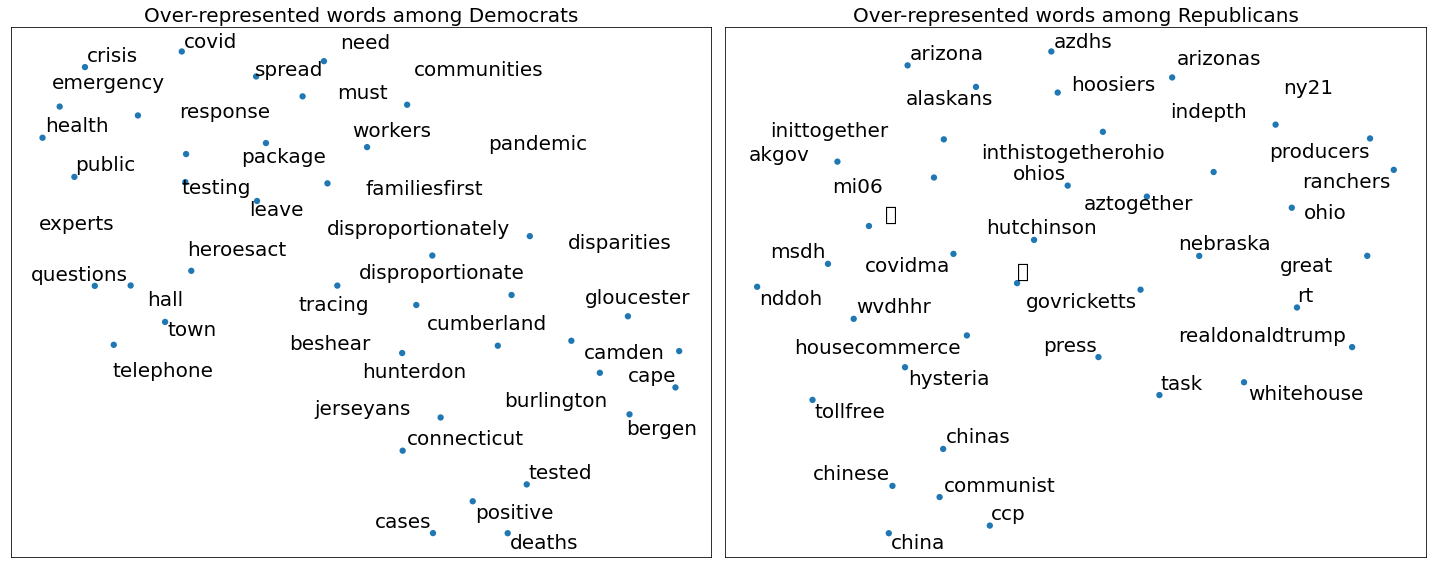

In [44]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
words = dem_embedding.word.tolist()
x = dem_embedding.x.tolist()
y = dem_embedding.y.tolist()
plt.scatter(x,y, edgecolors='None', s=40)
plt.xticks([])
plt.yticks([])
all_text = [plt.text(x[idx],y[idx], words[idx], fontsize=20) for idx in range(len(words))]
adjust_text(all_text)#add_objects=[line, rep_l1,rep_l2, rep_l3]
plt.title('Over-represented words among Democrats', fontsize=20)

plt.subplot(1,2,2)
words = rep_embedding.word.tolist()
x = rep_embedding.x.tolist()
y = rep_embedding.y.tolist()
plt.scatter(x,y, edgecolors='None', s=40)
plt.xticks([])
plt.yticks([])
all_text = [plt.text(x[idx],y[idx], words[idx], fontsize=20) for idx in range(len(words))]
adjust_text(all_text)#add_objects=[line, rep_l1,rep_l2, rep_l3]
plt.title('Over-represented words among Republicans', fontsize=20)
plt.tight_layout()
# plt.savefig('logodds.pdf', format='pdf')

## Kmeans

In [1]:
from sklearn.cluster import KMeans

In [45]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(np.asarray(rep_embedding['embedding'].tolist()))
    wcss.append(kmeans.inertia_)

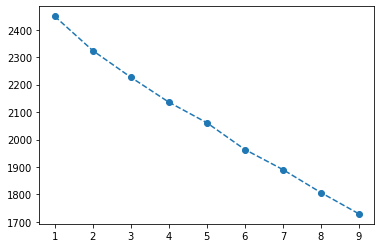

In [46]:
plt.plot(range(1,10), wcss, marker='o', linestyle='--')

In [78]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state=42)
kmeans.fit(np.asarray(dem_embedding['embedding'].tolist()))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [79]:
kmeans.labels_

array([2, 1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 3, 2, 2, 3, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2,
       2, 3, 1, 0, 2], dtype=int32)

In [80]:
dem_embedding['cluster'] = kmeans.labels_

In [81]:
dem_embedding[dem_embedding['cluster'] == 0]

,word,embedding,cluster
26,burlington,"[-0.701211, -0.702011, -0.160435, 0.258259, -0...",0
30,cumberland,"[-0.644459, 0.038861, -0.728411, -0.32737, 0.1...",0
31,cape,"[-0.816011, -0.014404, -0.683706, 0.615937, -0...",0
32,camden,"[-0.660689, -0.123469, 0.795516, 0.105743, 0.3...",0
35,hunterdon,"[-0.242182, 0.303362, 0.158785, 0.171304, -0.3...",0
37,gloucester,"[-0.584447, 0.243848, -0.266405, -0.32057, -0....",0
39,essex,"[-0.626086, -0.120291, 0.293403, -1.001246, -0...",0
48,hudson,"[-0.250821, 0.046543, 0.148868, 0.544217, 0.47...",0


In [82]:
dem_embedding[dem_embedding['cluster'] == 1]

,word,embedding,cluster
1,cases,"[0.22877, -0.551153, -0.611604, -0.07297, -0.3...",1
9,tested,"[-0.066548, -0.243701, -0.142226, -0.23379, -0...",1
10,disparities,"[0.517812, -0.07747, -0.121302, 0.075797, -0.9...",1
15,deaths,"[0.325738, -0.602571, 0.570581, 0.036195, 0.02...",1
19,positive,"[-0.250815, -0.192876, 0.17152, -0.392009, 0.0...",1
24,bergen,"[-0.00564, 0.239488, 0.265458, 0.062022, 0.192...",1
29,connecticut,"[-0.307485, 0.238784, 0.257256, -0.582551, -0....",1
40,jerseyans,"[0.053968, -0.152551, 0.920166, -0.282282, 0.2...",1
47,atlantic,"[0.307655, -0.528241, 0.130292, 0.467387, -0.4...",1


In [84]:
dem_embedding[dem_embedding['cluster'] == 2]

,word,embedding,cluster
0,covid,"[0.069882, -0.653657, -0.315337, -0.053915, 0....",2
2,pandemic,"[0.179868, -0.577754, -0.287896, 0.300043, 0.6...",2
3,health,"[0.294348, -0.326495, 0.095585, -0.362921, 0.4...",2
4,testing,"[0.290122, -0.307717, -0.054987, -0.711458, -0...",2
5,response,"[0.03868, -0.773224, -0.541467, -0.382501, 0.0...",2
6,familiesfirst,"[-0.669157, 0.241084, -0.273384, -0.577221, 0....",2
7,crisis,"[-0.044851, -0.612959, -0.297718, 0.2371, 0.24...",2
12,spread,"[-0.262965, 0.212817, -0.306013, 0.02059, 0.39...",2
13,questions,"[0.355062, -0.400599, 0.234139, -0.448673, 0.1...",2
16,emergency,"[0.130237, -0.800678, -0.49615, -0.091249, 0.1...",2
